In [1]:
%load_ext autoreload
%autoreload 2
%cd '/home/xingyu/Projects/PlasticineLab'
%pwd
from plb.envs import make
from imitation.train_full import get_args, set_random_seed

args = get_args(cmd=False)
args.env_name = 'LiftSpread-v1'

set_random_seed(args.seed)

device = 'cuda'
env = make(args.env_name, nn=(args.algo == 'nn'))

pkl_file = 'data/autobot/1001_ablation_no_tool_opt/1001_ablation_no_tool_opt/1001_ablation_no_tool_opt_2021_10_03_22_28_36_0001/plan_epoch_360/execute_0.pkl'

import pickle
with open(pkl_file, 'rb') as f:
    traj = pickle.load(f)

/home/xingyu/Projects/PlasticineLab
[Taichi] mode=release
[Taichi] preparing sandbox at /tmp/taichi-qnm9n9ae
[Taichi] version 0.7.26, llvm 10.0.0, commit e37bdb5e, linux, python 3.8.5
[Taichi] Starting on arch=cuda
[Tina] version 0.1.1
[Tina] Taichi properties hacked
pimirives: num primitive: 3
Building primitive
action:
  dim: 6
  scale: (0.7, 0.005, 0.005, 0.005, 0.0, 0.0)
collision_group: [0.0, 0.0, 0.0]
color: (0.7568, 0.6039, 0.4196)
friction: 0.9
h: 0.3
init_pos: (0.3, 0.25, 0.5)
init_rot: (0.707, 0.707, 0.0, 0.0)
lower_bound: (0.0, 0.16, 0.0)
r: 0.03
shape: RollingPinExt
upper_bound: (1.0, 1.0, 1.0)
variations: None
Building primitive
action:
  dim: 6
  scale: (0.01, 0.01, 0.0, 0.0, 0.0, 0.05)
collision_group: [0, 0, 1]
color: (0.7568, 0.6039, 0.4196)
friction: 50.0
init_pos: (0.65, 0.02, 0.5)
init_rot: (0.707, 0.707, 0.0, 0.0)
lower_bound: (0.0, 0.0, 0.0)
shape: Box
size: (0.1, 0.1, 0.02)
upper_bound: (1.0, 1.0, 1.0)
variations: None
Building primitive
action:
  dim: 0
  scale:

In [2]:
print(traj.keys())
print(traj['target_v'])

dict_keys(['score', 'traj_succ', 'traj_score', 'tool', 'traj_img', 'init_v', 'target_v', 'actions'])
109


In [8]:
from imitation.utils import save_numpy_as_gif
from imitation.env_spec import set_render_mode
from IPython.display import Image
import numpy as np
gif_name = './data/debug_ablation/test.gif'
print(env.action_space)
set_render_mode(env, args.env_name)
def replay(traj):
    env.reset(init_v = traj['init_v'], target_v = traj['target_v'])
    frames = []
    for action in traj['actions']:
        action[6:] = 1.
        _, _, _, info = env.step(action)
        img = env.render(mode='rgb')
        frames.append(img[:, :, :3])

    save_numpy_as_gif(np.array(frames), gif_name)
    print(info['info_normalized_performance'])
replay(traj)



Box(-1.0, 1.0, (12,), float32)
Env reseting to: datasets/0923_LiftSpread/target/target_109.npy, init v: 104, target v: 109
emd after reset: 0.6502284407615662
======================WARNING: contact loss mask not set================
MoviePy - Building file ./data/debug_ablation/test.gif with imageio.


-0.17151490101359215


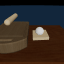

In [9]:
Image(gif_name)